<a href="https://colab.research.google.com/github/kimyujin0/Machine-Learning_2022/blob/main/%EC%B5%9C%EC%A2%85_%EC%8B%A4%EC%8A%B5_%ED%83%80%EC%9D%B4%ED%83%80%EB%8B%89.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
 from google.colab import files
 upload = files.upload()

Saving train.csv to train (1).csv
Saving test.csv to test (1).csv


In [69]:
import pandas as pd
import io

df = pd.read_csv(io.StringIO(upload['train.csv'].decode('utf-8')))
# train 데이터셋을 불러오고 데이터 프레임으로 변환

train = df
print(train)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [70]:
df0 = pd.read_csv(io.StringIO(upload['test.csv'].decode('utf-8')))
# test 데이터셋을 불러오고 데이터 프레임으로 변환

test = df0
print(test)

     PassengerId  Pclass                                          Name  \
0            892       3                              Kelly, Mr. James   
1            893       3              Wilkes, Mrs. James (Ellen Needs)   
2            894       2                     Myles, Mr. Thomas Francis   
3            895       3                              Wirz, Mr. Albert   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                           ...   
413         1305       3                            Spector, Mr. Woolf   
414         1306       1                  Oliva y Ocana, Dona. Fermina   
415         1307       3                  Saether, Mr. Simon Sivertsen   
416         1308       3                           Ware, Mr. Frederick   
417         1309       3                      Peter, Master. Michael J   

        Sex   Age  SibSp  Parch              Ticket      Fare Cabin Embarked  
0      male  34.5      0      0 

In [71]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [72]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [73]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [74]:
print(train.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [75]:
# 결측치 확인
print(pd.isnull(train).sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [76]:
print(pd.isnull(test).sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


데이터 시각화

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [78]:
def pivot(feature):
    pclass_pivot = train.pivot_table(index=[feature],values="Survived")
    pclass_pivot.plot.bar()
    plt.show()

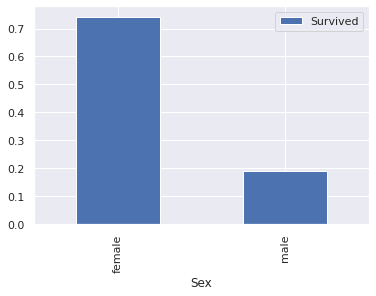

In [79]:
pivot('Sex')

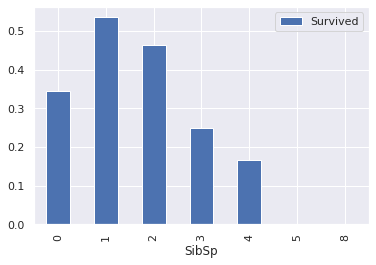

In [80]:
pivot('SibSp')

데이터 전처리

In [81]:
train_test_data = [train,test] # test 데이터와 train 데이터 합치기
for dataset in train_test_data :
    dataset["Title"] = dataset["Name"].str.extract('([A-za-z]+)\.', expand =False)

# 이름에서 성별 확인 가능 데이터 추출

In [82]:
test['Title'].value_counts

<bound method IndexOpsMixin.value_counts of 0          Mr
1         Mrs
2          Mr
3          Mr
4         Mrs
        ...  
413        Mr
414      Dona
415        Mr
416        Mr
417    Master
Name: Title, Length: 418, dtype: object>

In [83]:
train['Title'].value_counts

<bound method IndexOpsMixin.value_counts of 0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Title, Length: 891, dtype: object>

In [84]:
# Ms와 Miss 넘버링
title_mapping = {"Mr":0, "Miss" : 1, "Mrs" :2, "Master" :3, "Dr" : 3,
                 "Rev" :3, "Col":3, "Ms":2, "Mile" :3, "Major":3,"Lady":3,
                 "Capt":3, "Sir":3,"Mme":3,"Jonkheer":3,"Countess":3}
for dataset in train_test_data:
    dataset["Title"] = dataset['Title'].map(title_mapping)
    #이름에서 성별 요인들을 0~3까지 mapping

In [85]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.0


In [86]:
print(pd.isnull(train).sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            3
dtype: int64


In [87]:
print(pd.isnull(test).sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Title            1
dtype: int64


In [88]:
# 결측치 평균값으로 대체
test["Title"].fillna(df["Title"].mean(), inplace=True)

In [89]:
train["Title"].fillna(df["Title"].mean(), inplace=True)

In [90]:
print(pd.isnull(train).sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64


In [91]:
print(pd.isnull(test).sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Title            0
dtype: int64


In [92]:
# 결측치를 중위값으로 처리
df1 = train
df1['Age'].fillna(df1['Age'].median(), inplace=True)

df2 = test
df2['Age'].fillna(df2['Age'].median(), inplace=True)

In [93]:
train['Age'].isnull().sum()

0

In [94]:
test['Age'].isnull().sum()

0

In [95]:
train["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [96]:
train["Embarked"] = train["Embarked"].fillna("S")
# 빈 칸을 S로 넣기

In [97]:
#mapping
train["Embarked"][train["Embarked"] == "S"]=0
train["Embarked"][train["Embarked"] == "C"]=1
train["Embarked"][train["Embarked"] == "Q"]=2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from 

In [98]:
test["Embarked"][test["Embarked"] == "S"]=0
test["Embarked"][test["Embarked"] == "C"]=1
test["Embarked"][test["Embarked"] == "Q"]=2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid 

In [99]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,0,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1,2.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,0,2.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,0,0.0


In [100]:
train["Embarked"].isnull().sum()

0

In [101]:
test["Embarked"].isnull().sum()

0

In [102]:
# 평균값으로 채우기
test["Fare"].fillna(df["Fare"].mean(), inplace=True)

In [103]:
train = train.drop(["Name"],axis=1)
test = test.drop(["Name"], axis=1)

In [104]:
train = train.drop(["PassengerId"],axis=1)
test = test.drop(["PassengerId"], axis=1)

In [105]:
train = train.drop(["Cabin"],axis=1)
test = test.drop(["Cabin"], axis=1)

In [106]:
train = train.drop(["Ticket"],axis=1)
test = test.drop(["Ticket"], axis=1)

In [109]:
sex_mapping = {"male":0, "female":1}
train['Sex'] = train['Sex'].map(sex_mapping)
test["Sex"] = test["Sex"].map(sex_mapping)

In [110]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,0,0.0
1,1,1,1,38.0,1,0,71.2833,1,2.0
2,1,3,1,26.0,0,0,7.9250,0,1.0
3,1,1,1,35.0,1,0,53.1000,0,2.0
4,0,3,0,35.0,0,0,8.0500,0,0.0


In [111]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,0,34.5,0,0,7.8292,2,0.0
1,3,1,47.0,1,0,7.0000,0,2.0
2,2,0,62.0,0,0,9.6875,2,0.0
3,3,0,27.0,0,0,8.6625,0,0.0
4,3,1,22.0,1,1,12.2875,0,2.0


모델 구축하기

In [112]:
from sklearn.model_selection import train_test_split

In [114]:
pred = train.drop(['Survived'], axis =1)
target = train['Survived']
# 예측해야될 것이 survived이기 때문에 따로 떼어내어 예측

In [115]:
X_train, X_test, y_train, y_test = train_test_split(pred, target, test_size = 0.3)

#회귀보다는 분류!
로지스틱 회귀

In [117]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logr = LogisticRegression()
logr.fit(X_train, y_train)
y_pred = logr.predict(X_test)
acc_logr = round(accuracy_score(y_pred, y_test)*100,2)
print(acc_logr)

78.73


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


의사결정나무

In [134]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)
acc_tree = round(accuracy_score(y_pred, y_test)*100,2)
print(acc_tree)

76.87


랜덤 포레스트

In [124]:
from sklearn.ensemble import RandomForestClassifier

random = RandomForestClassifier()
random.fit(X_train, y_train)
y_pred = random.predict(X_test)
acc_ran = round(accuracy_score(y_pred, y_test)*100,2)
print(acc_ran)

80.97


KNN

In [128]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
acc_knn = round(accuracy_score(y_pred, y_test)*100,2)
print(acc_knn)

76.12


In [136]:
models = pd.DataFrame({
    'model' : ['KNN','Logistic Regression', 'Random Forest','Desision Tree'],
    'score' : [acc_knn, acc_logr, acc_ran, acc_tree]
})

In [137]:
models.sort_values(by='score', ascending=False)

,model,score
2,Random Forest,80.97
1,Logistic Regression,78.73
3,Desision Tree,76.87
0,KNN,76.12
